<a href="https://colab.research.google.com/github/MarietaVoskanyan/online-delivery-project/blob/main/online_delivery_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#անհրաժեշտ գրադարանների ներմուծում
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [3]:
#տվյալների հավաքածուի ներմուծում
df = pd.read_csv("/content/onlinedeliverydata.csv")
df.head()


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL



# **Տվյալների ուսումնասիրություն և նախապատրաստում (EDA)**

In [4]:
#տողերի և սյունակների քանակը
df.shape

(388, 55)

In [5]:
#տվյալների հավաքածուի սյուների մասին ընդհանուր տեղեկություն
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [6]:
#ստուգենք բացակայող արժեքները
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                   

In [7]:
df = df.dropna()
df.isnull().sum().any()

np.False_

In [8]:
#կրկնվող տողերի հեռացում
print('Duplicated rows:', len(df[df.duplicated()]))
df = df.drop_duplicates()
df.duplicated().sum().any()

Duplicated rows: 102


np.False_

In [9]:
#վիճակագրական ամփոփ տվյալներ
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,24.649123,3.270175,12.972982,77.597092,560036.891228
std,3.021584,1.355994,0.043722,0.053598,30.788329
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.943800,77.563300,560010.000000
50%,24.000000,3.000000,12.977000,77.586400,560027.000000
75%,26.000000,4.000000,12.998000,77.622700,560066.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


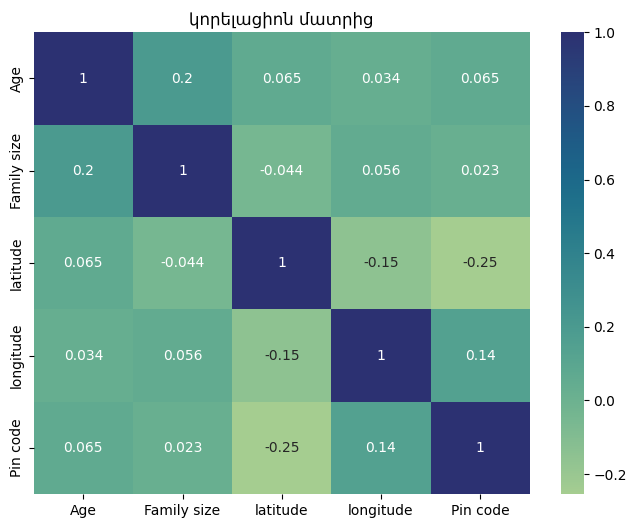

In [10]:
#սյուների միջև կորելացիան, կորելացիոն մատրիցը թվային փոփոխականների համար
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True,cmap="crest")
plt.title("կորելացիոն մատրից")
plt.show()

                                              Seaborn կորելյացիա                                              


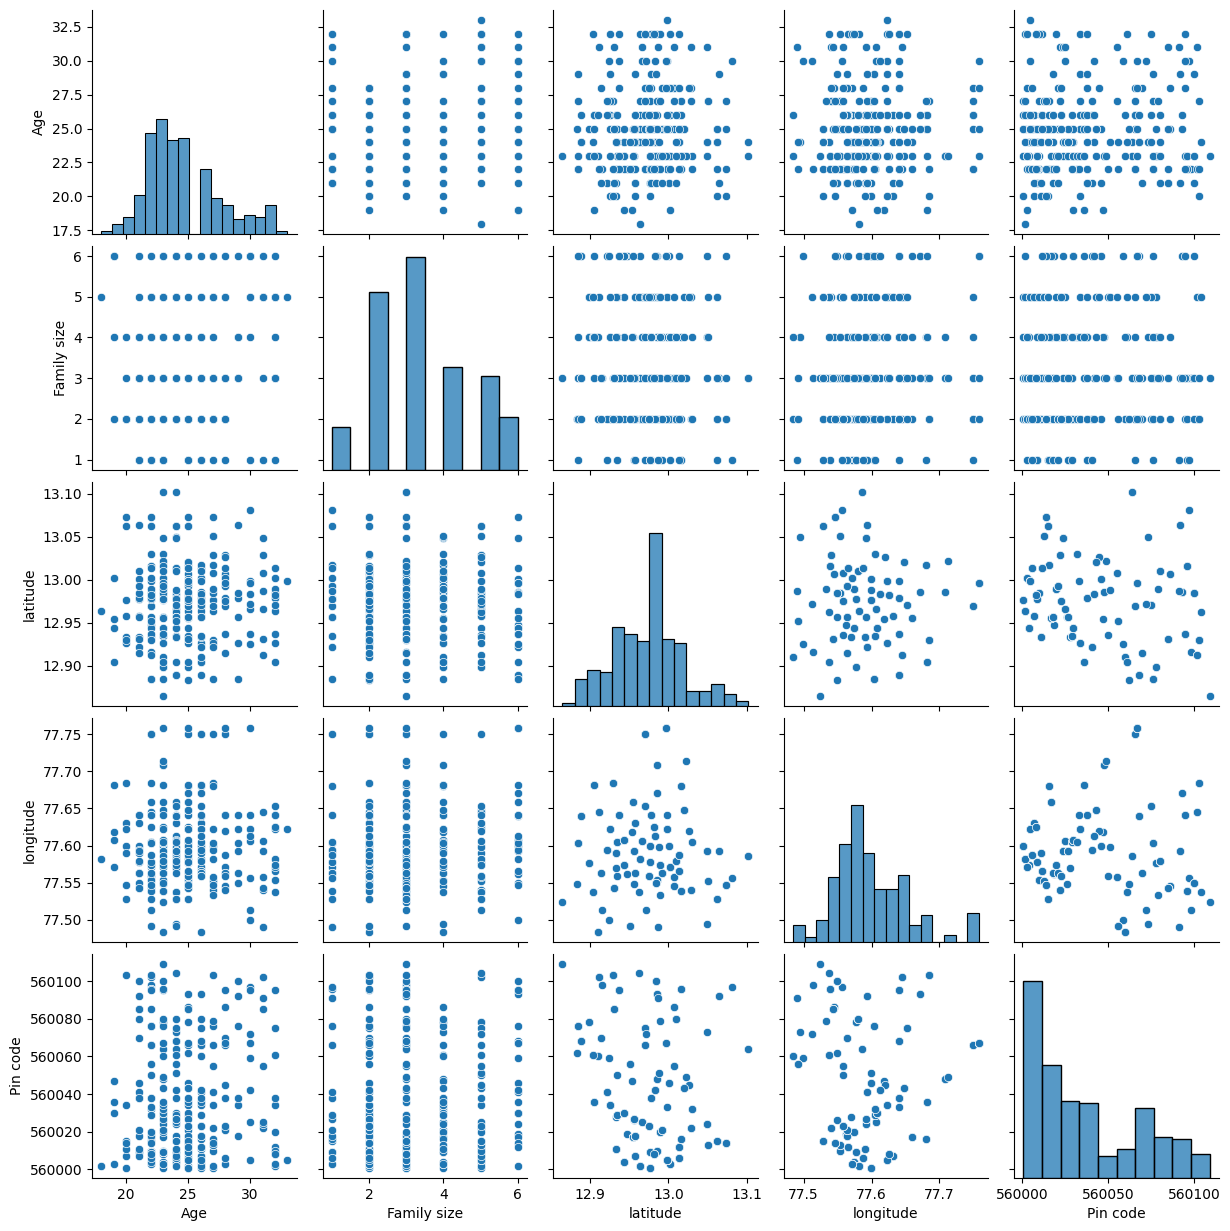

In [11]:
print ("Seaborn կորելյացիա".center(110))
sns.pairplot(df)

չկա որեւէ սյուների միջեւ բարձր կորելացիա, հետեւաբար կարիք չկա ինչ֊որ սյուներ չդիտարկել:

# **Տվյալների վիզուալիզացիա**

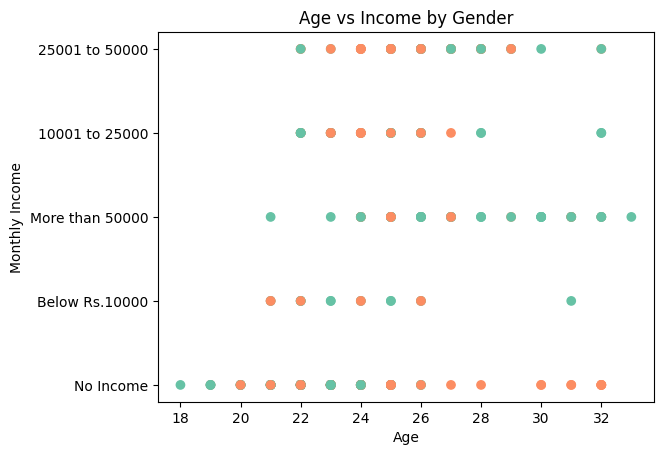

In [12]:
#օգտատերերի տարիքի և ամսական եկամուտի միջեւ կապը ըստ սեռի (կանաչ` տղա, նարնջագույն` աղջիկ)
palette = sns.color_palette("Set2", n_colors=2)
gender_map = {'Male': palette[0], 'Female': palette[1]}
colors = df["Gender"].map(gender_map)

plt.scatter(df['Age'], df['Monthly Income'], c=colors)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Age vs Income by Gender")
plt.show()


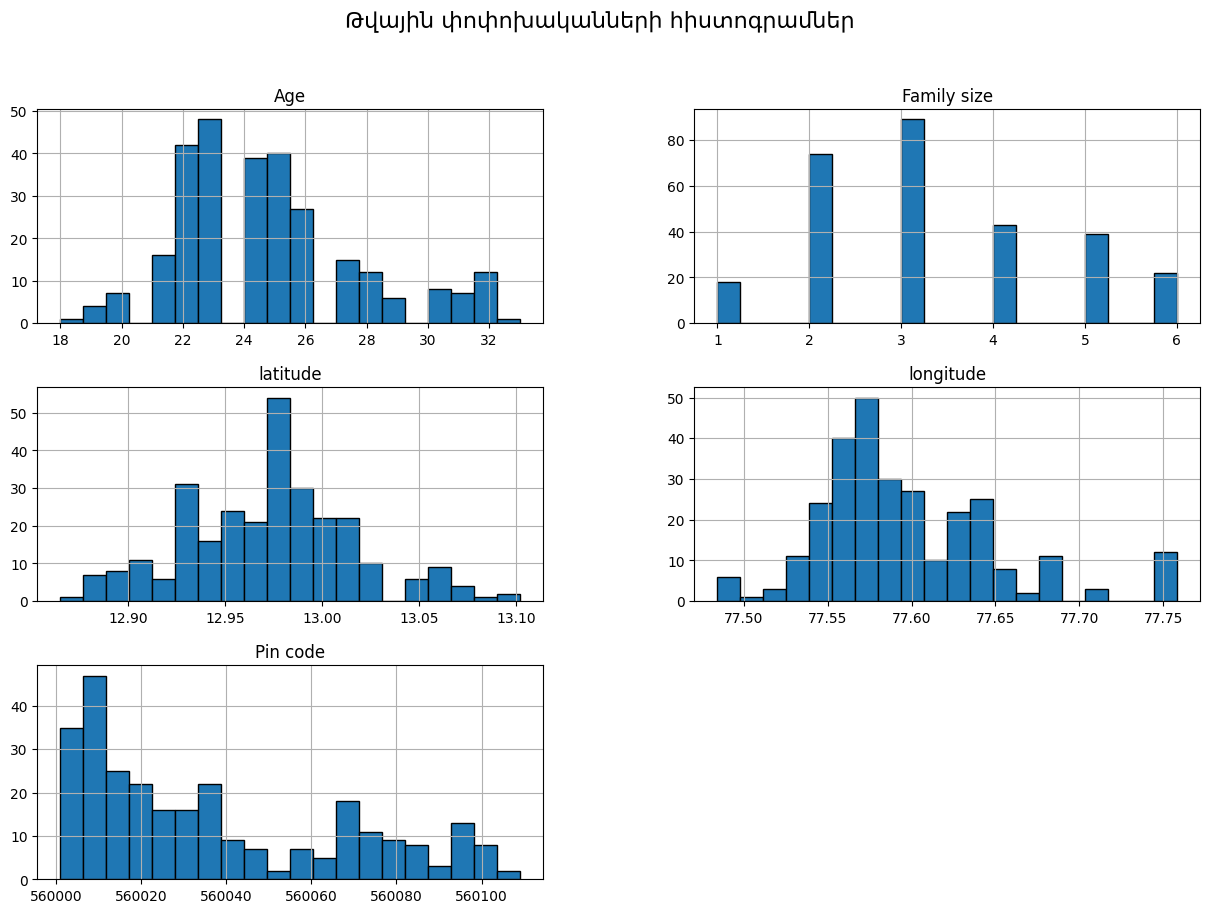

In [13]:
# Թվային փոփոխականների բաշխումների վիզուալ ներկայացում

#հիստոգրամներ
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Թվային փոփոխականների հիստոգրամներ", fontsize=16)
plt.show()

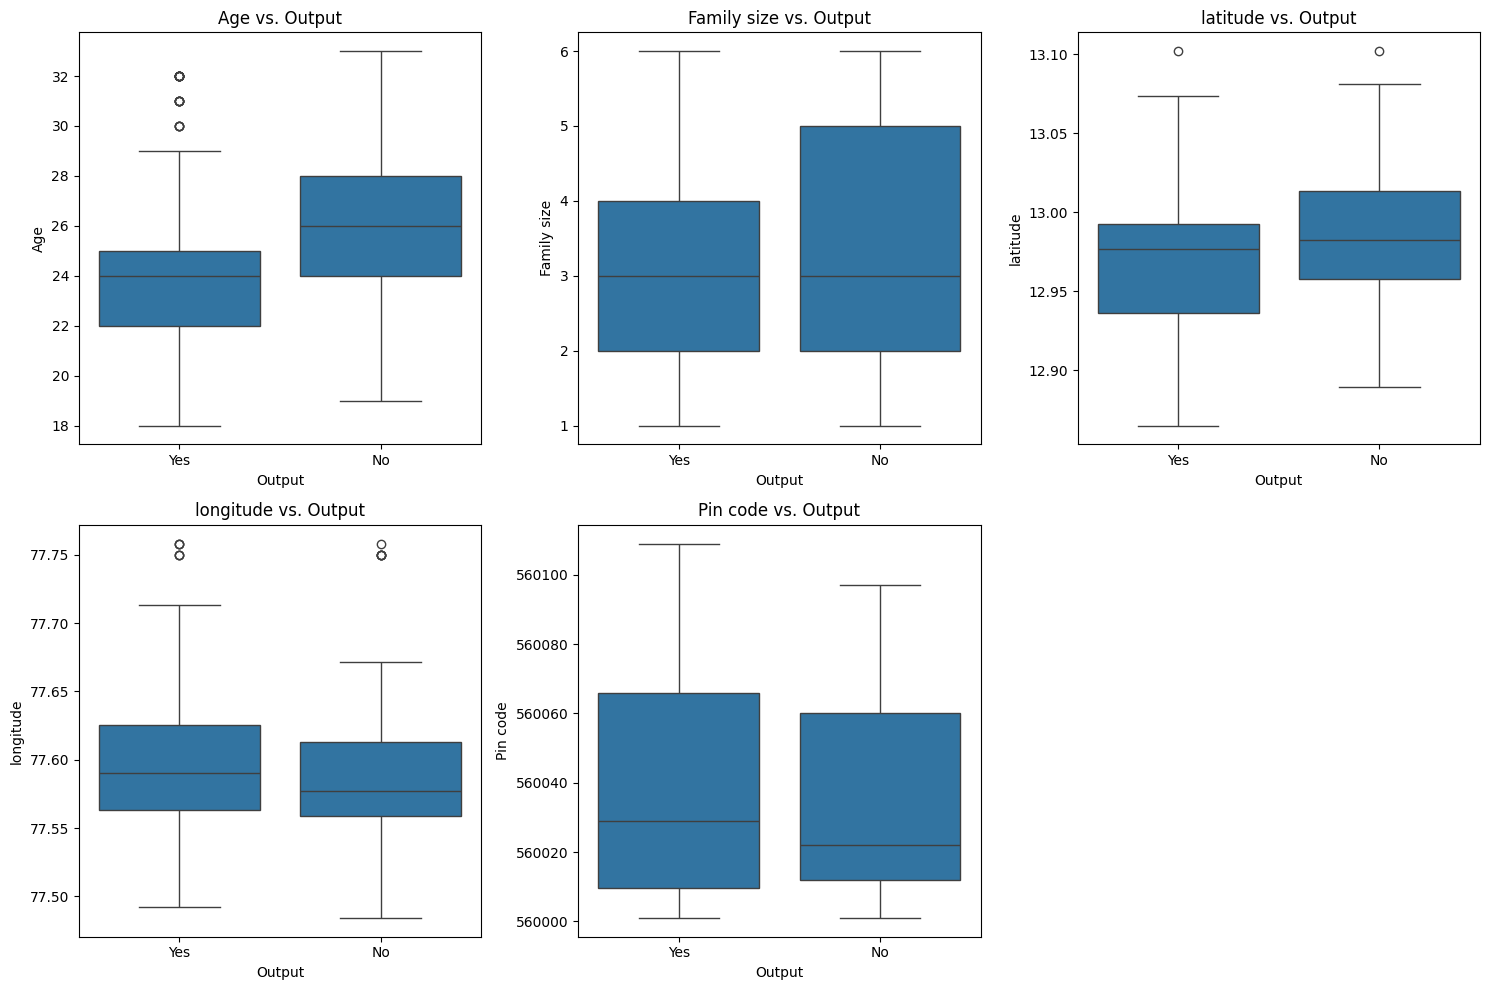

In [14]:
#համեմատական boxplot-երը ըստ 'Output'-ի

num_cols = len(numeric_cols)
ncols = 3
nrows = (num_cols + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, x='Output', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs. Output')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/tmp/ipython-input-15-489048698.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')
/tmp/ipython-input-15-489048698.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Occupation', palette='Set3', order=df['Occupation'].value_counts().index)
/tmp/ipython-input-15-489048698.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Output', palette='coolwarm')


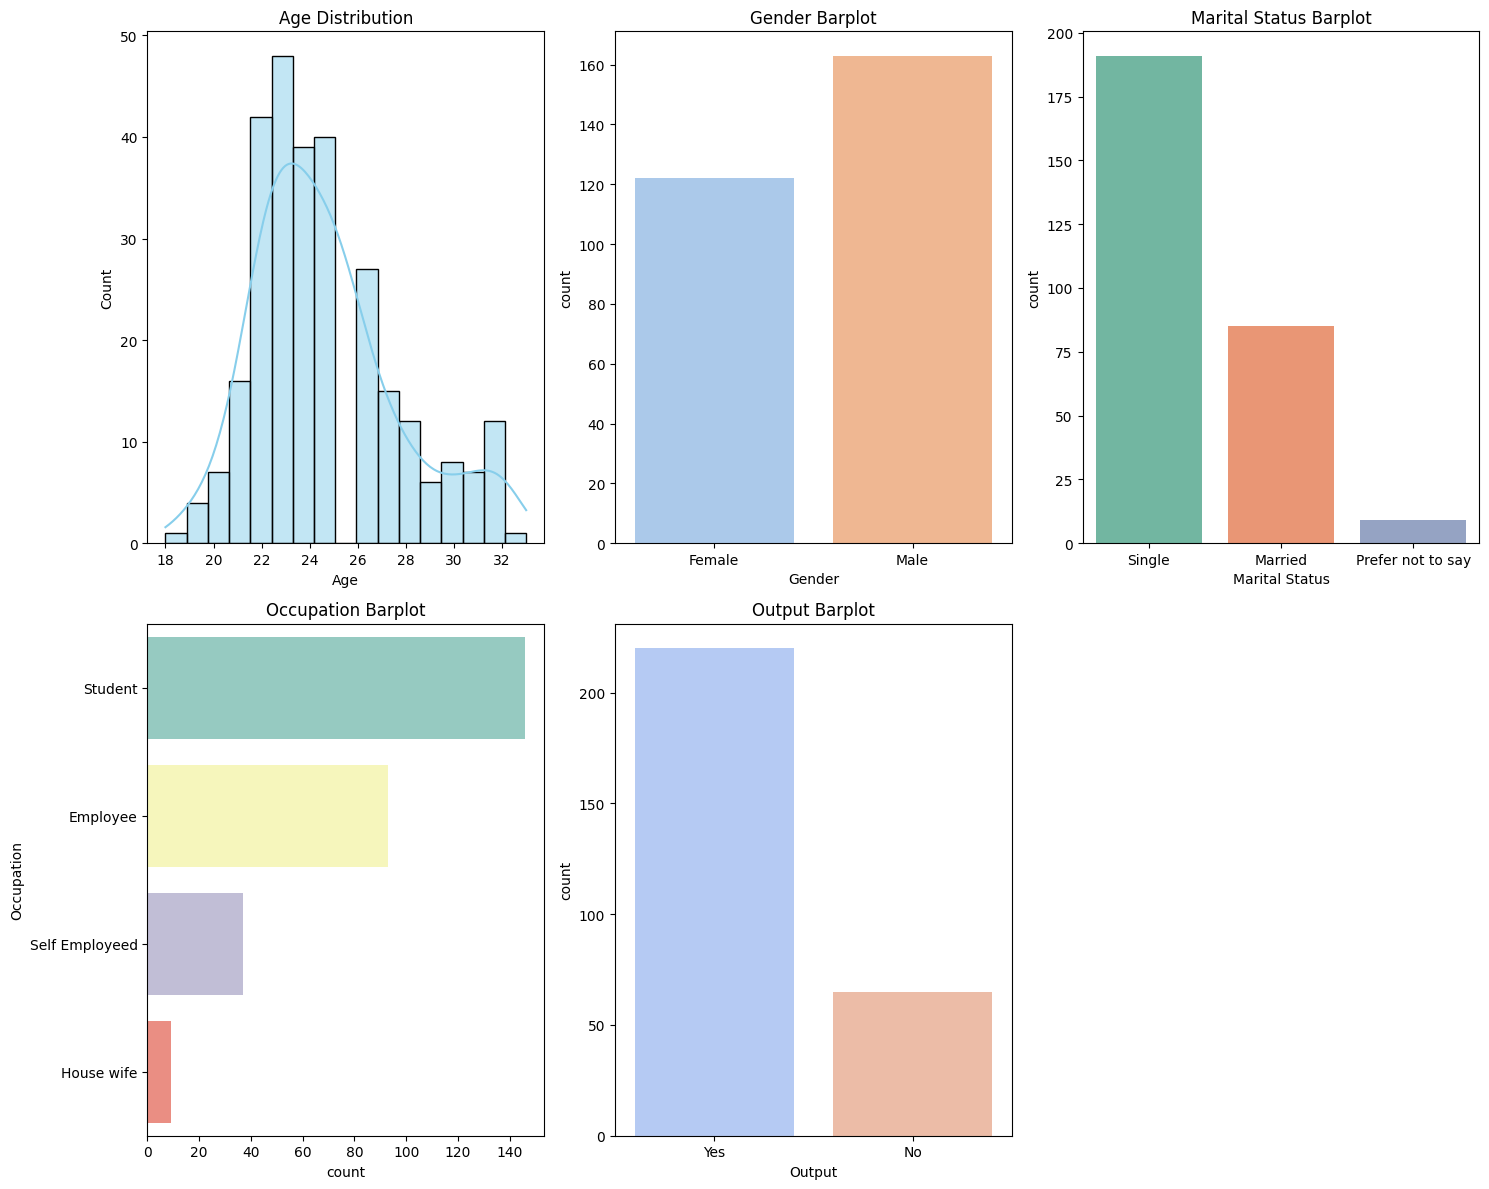

In [15]:
#Barplot-երը մի քանի կատեգորիկ փոփոխականների համար

plt.figure(figsize=(15, 12))
# Age բաշխում
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title("Age Distribution")

# Gender count
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Gender Barplot")

# Marital Status
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Marital Status', palette='Set2')
plt.title("Marital Status Barplot")

# Occupation
plt.subplot(2, 3, 4)
sns.countplot(data=df, y='Occupation', palette='Set3', order=df['Occupation'].value_counts().index)
plt.title("Occupation Barplot")

# Output
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Output', palette='coolwarm')
plt.title("Output Barplot")

plt.tight_layout()
plt.show()

# **Data preprocessing**

In [16]:
#կատեգորիկ տվյալների վերափոխում
columnsToEncode = df.columns[1:6].append(df.columns[10:38]).append(df.columns[39:-1])

labelencoder = LabelEncoder()
for column in columnsToEncode:
  print(df[column].value_counts())
  df[column] = labelencoder.fit_transform(df[column])
  print(df[column].value_counts(),'\n\n')

Gender
Male      163
Female    122
Name: count, dtype: int64
Gender
1    163
0    122
Name: count, dtype: int64 


Marital Status
Single               191
Married               85
Prefer not to say      9
Name: count, dtype: int64
Marital Status
2    191
0     85
1      9
Name: count, dtype: int64 


Occupation
Student           146
Employee           93
Self Employeed     37
House wife          9
Name: count, dtype: int64
Occupation
3    146
0     93
2     37
1      9
Name: count, dtype: int64 


Monthly Income
No Income          134
25001 to 50000      50
More than 50000     47
10001 to 25000      36
Below Rs.10000      18
Name: count, dtype: int64
Monthly Income
4    134
1     50
3     47
0     36
2     18
Name: count, dtype: int64 


Educational Qualifications
Post Graduate    129
Graduate         122
Ph.D              21
School            11
Uneducated         2
Name: count, dtype: int64
Educational Qualifications
2    129
0    122
1     21
3     11
4      2
Name: count, dtype: in

Լուծելու ենք դասակարգման խնդիր` կառուցել մոդել, որը կկանխատեսի 0 կամ 1:   

**Target:** Output

**Features:** Age, Gender, Marital Status, Occupation, Monthly Income, Educational Qualifications, Ease and convenient, Time saving, More restaurant choices, Easy Payment option, More Offers and Discount, Good Food quality, Good Tracking system, Residence in busy location, Google Maps Accuracy, Good Road Condition, Low quantity low time, Delivery person ability, Influence of rating, Less Delivery time, High Quality of package, Number of calls, Politeness, Freshness, Temperature, Good Taste, Good Quantity

Նախ դիտարկենք **Logistic Regression** մոդելը.

In [84]:
X = df[df.columns[0:6].append(df.columns[16:23]).append(df.columns[39:53])]
y = df['Output'].astype(int)

# Train-test բաժանում

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression մոդել
log_reg = LogisticRegression(max_iter=1000)

# Հիպերպարամետրերի գնահատում
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearch with 5-fold Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Լավագույն մոդելը
best_model = grid_search.best_estimator_

# կանխատեսում
y_pred = best_model.predict(X_test_scaled)
print("Confusion Matrix:",confusion_matrix(y_test, y_pred))

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Confusion Matrix: [[ 0 12]
 [ 0 45]]
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      1.00      0.88        45

    accuracy                           0.79        57
   macro avg       0.39      0.50      0.44        57
weighted avg       0.62      0.79      0.70        57

Accuracy: 0.7894736842105263


**Մեկնաբանություն:**
<div align="center">


| | կանխատեսել է 0 (դժգոհ է) | կանխատեսել է 1 (գոհ է) |
|----------|----------|----------|
|իրականում 0 է| <div align="center">0 (TN)    | <div align="center">12 (FP) |
|իրականում 1 է| <div align="center">0 (FN)    | <div align="center">45 (TP) |

- Precision (Class 0): Կանխատեսված դժգոհ հաճախորդների 0%-ն է ճիշտ եղել։
- Recall (Class 0): Իրականում դժգոհ հաճախորդների 0%-ի համար  է ճիշտ կանխատեսվել։
- Precision (Class 1): Կանխատեսված գոհ հաճախորդների 79%-ը ճիշտ են եղել։
- Recall (Class 1): Իրականում գոհ հաճախորդների 100%-ի համար ճիշտ է կանխատեսվել։  
  

***
Accuracy = 0.79 → Մոդելը ճիշտ է կանխատեսել արդյունքների 79%-ը։  

Macro avg F1 = 0.44 → Միջին F1-ը, երբ երկու դասերին էլ հավասարապես է վերաբերվում։

Weighted avg F1 = 0.7 → Միջին F1-ը, երբ հաշվի է առնվում դասերի չհավասարակշռվածությունը։  
***
Այս մոդելը բոլոր 57 թեստային օրինակի համար կանխատեսել է միայն Class 1-ը («գոհ»):

Այսպիսով՝

Բոլոր 12 Class 0 նմուշները սխալ են դասակարգվել → Recall = 0։

Քանի որ Class 0 ոչ մի անգամ չի կանխատեսվել, ապա Precision = 0


Մոդելը ճիշտ է կանխատեսել 45 նմուշ, որոնք բոլորը Class 1 էին։

Քանի որ Class 0 շատ քիչ է (հավանաբար տվյալների մեջ անհավասար բաշխվածություն կա), և մոդելը այն ամբողջությամբ անտեսել է, ապա

accuracy-ն բարձր է երևում, բայց դա մոլորեցնող է, որովհետև մոդելը պարզապես կանխատեսում է մեծամասնության դասը։



Այժմ դիտարկենք **Random Forest** մոդելը.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.94      0.98      0.96        45

    accuracy                           0.93        57
   macro avg       0.92      0.86      0.89        57
weighted avg       0.93      0.93      0.93        57

Accuracy: 0.9298245614035088
Confusion Matrix:
 [[ 9  3]
 [ 1 44]]


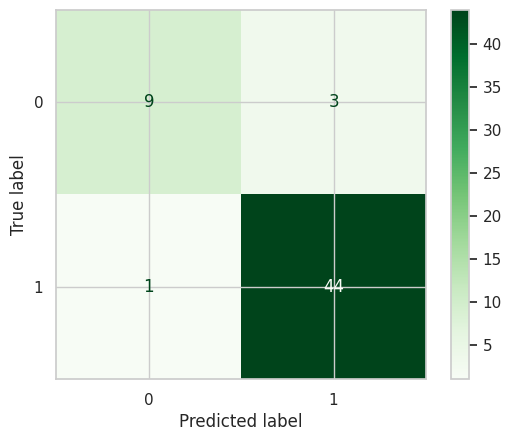

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest մոդել
rf = RandomForestClassifier(random_state=42)

# Հիպերպարամետրերի գնահատում
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees
    'max_depth': [None, 5, 10],           # Depth of each tree
    'min_samples_split': [2, 5],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2],           # Minimum samples in a leaf
    'bootstrap': [True, False]            # Bootstrap sampling
}

# Grid search with 5-fold Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Լավագույն մոդելը
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test_scaled)

# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# կանխատեսում
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Greens')

**Մեկնաբանություն:**
<div align="center">


| | կանխատեսել է 0 (դժգոհ է) | կանխատեսել է 1 (գոհ է) |
|----------|----------|----------|
|իրականում 0 է| <div align="center">9 (TN)    | <div align="center">3 (FP) |
|իրականում 1 է| <div align="center">1 (FN)    | <div align="center">44 (TP) |





***
Accuracy = 0.93 → Մոդելը ճիշտ է կանխատեսել արդյունքների 93%-ը։  

Random Forest դասակարգիչը շատ ավելի լավ է աշխատում, քան լոգիստիկ ռեգրեսիան, որը ամբողջությամբ բաց էր թողել Class 0 -ն։

Այժմ այն կարողանում է ճանաչել երկու դասերն էլ, ունենալով բարձր precision և recall երկուսի համար։

Թերությունը նկատվում է Class 0 -ի կանխատեսման մեջ (միայն 9-ը ճիշտ 12-ից), ինչը, ամենայն հավանականությամբ, պայմանավորված է տվյալ դասի փոքր ներկայացվածությամբ տվյալների մեջ։

Այժմ դիտարկենք **SVM** մոդելը.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM - Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.83      0.89      0.86        45

    accuracy                           0.77        57
   macro avg       0.64      0.61      0.62        57
weighted avg       0.75      0.77      0.76        57

Accuracy: 0.7719298245614035


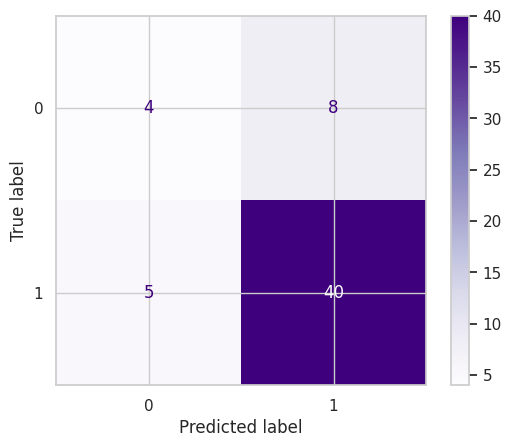

In [91]:
svm = SVC()

# Grid of hyperparameters
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with 5-fold CV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Best SVM model
best_svm = grid_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluation
print("SVM - Best Parameters:", grid_search_svm.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=best_svm.classes_)
disp_svm.plot(cmap='Purples')


**Մեկնաբանություն:**  

SVM-ը կրկին վատ է կանխագուշակում Class 0֊ն: Ավելի վատ արդյունք քան Random Forest֊ի դեպքում:

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.93      0.93      0.93        45

    accuracy                           0.89        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.89      0.89      0.89        57

Accuracy: 0.8947368421052632


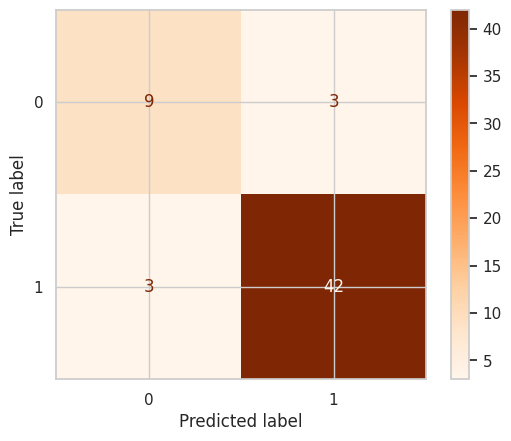

In [94]:
gb = GradientBoostingClassifier(random_state=42)

# Grid of hyperparameters
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Grid search
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

# Best model
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)

# Evaluation
print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=best_gb.classes_)
disp_gb.plot(cmap='Oranges')

**Մեկնաբանություն:**  

Gradient Boosting֊ը եւ Random Forest֊ը էլ նույն արդյունքն ունեն դաս 0-ի վրա՝ 75% precision/recall։

Gradient Boosting-ը սովորաբար ավելի կայուն է, բայց այս դեպքում Random Forest-ը մի փոքր գերազանցում է։

# Եզրակացություն

Մոդելների համեմատություն:  
<div align="center">


| Մոդել | Միջին F1-score	 | Դիտողություններ |
|----------|----------|----------|
|Logistic Regression| <div align="center">0.79    |Չի կանխագուշակում դժգոհ հաճախորդներին|
|Random Forest| <div align="center">0.93    | Լավագույն մոդելը |
|SVM| <div align="center">0.77    | Վատագույն մոդելը|
|Gradient Boosting| <div align="center">0.89    | Կրկին լավ մոդել, որը կայուն է |
